<a href="https://colab.research.google.com/github/WoogiWooks/Kaggle_ML/blob/main/%ED%9A%8C%EA%B7%80_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
""" 평가지표 = RMSLE """
""" 가격이 비싼 주택일수록 예측결과 오류가 전체 오류에 미치는 영향이 크기에 이를 상쇄하고자 로그취한 지표 사용 """

' 가격이 비싼 주택일수록 예측결과 오류가 전체 오류에 미치는 영향이 크기에 이를 상쇄하고자 로그취한 지표 사용 '

In [ ]:
df_org = pd.read_csv("/content/drive/MyDrive/캐글/완벽가이드 예제/5장. 회귀/house_prices/train.csv")
df = df_org.copy()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
# null 값 컬럼 확인

isnull = df.isnull().sum()
isnull[isnull>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

# **1차 가공**

### **Null값 처리**

In [ ]:
# 불필요 피쳐와 null값이 너무 많은 피쳐는 드롭!!!!

df.drop(["Id", "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1, inplace=True)

In [ ]:
# 숫자형 피쳐의 Null 값은 평균값으로 대체
# mean() 은 숫자형 컬럼만 뽑아 컬럼별 평균값을 내줌

df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
isnull = df.isnull().sum()
isnull[isnull>0].sort_values(ascending=False)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
Electrical       1
dtype: int64

In [ ]:
# Null 값이 있는 피쳐의 타입확인

isnull = df.isnull().sum()
df.dtypes[isnull>0]

# Object 타입만 남음

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

In [ ]:
# 문자형(Object) 타입 피처는 원핫인코딩 적용으로 Null값 처리

df_ohe = pd.get_dummies(df)
df_ohe.shape

(1460, 271)

In [ ]:
isnull_ohe = df_ohe.isnull().sum()
isnull_ohe[isnull_ohe>0].sort_values(ascending=False)

# Null값 처리 완료

Series([], dtype: int64)

### **타겟값 정규분포 체크**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


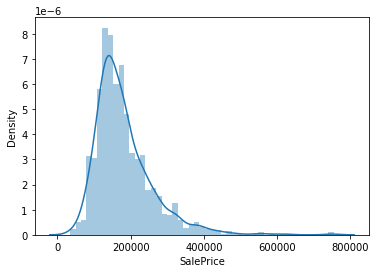

In [ ]:
sns.distplot(df_ohe["SalePrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


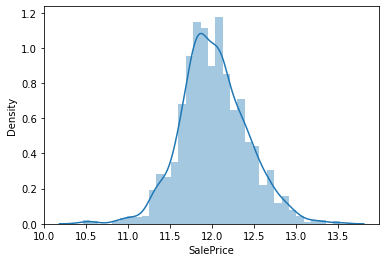

In [ ]:
# 로그변환 적용

log_sp = np.log1p(df_ohe["SalePrice"])
sns.distplot(log_sp)

In [ ]:
origin_sp = df_ohe["SalePrice"]
df_ohe["SalePrice"] = log_sp

In [ ]:
""" RMSLE 는 실제값과 예측값의 차이(오류)를 로그변환 취한 뒤 RMSE 를 적용하는 것 """
""" 현재 실제값이 로그변환이 되었고 예측값도 로그 변환 값으로 나오게 됨 """
""" 따라서 로그변환된 것에 RMSE 적용하면 RMSLE 가 측정되는 것 """

############## log(A-B) == log(A)-log(B) ##############

' 따라서 로그변환된 것에 RMSE 적용하면 RMSLE 가 측정되는 것 '

In [ ]:
def get_rmse(model):
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)
  print(model.__class__.__name__, "로그변환된 RMSE :", np.round(rmse, 3))
  return rmse

def get_rmses(models):
  rmses=[]
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y_target = df_ohe["SalePrice"]
X_features = df_ohe.drop("SalePrice", axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=1)

In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그변환된 RMSE : 0.137
Ridge 로그변환된 RMSE : 0.132
Lasso 로그변환된 RMSE : 0.18


[0.13716549514428528, 0.13231195162094717, 0.1799422314831869]

### **학습 후 회귀계수 확인**

In [ ]:
# 피쳐별 회귀계수 추출 (상하위 10개)

def get_coef(model, n=10):
  coef = pd.Series(model.coef_, index=X_features.columns)

  coef_high = coef.sort_values(ascending=False).head(n)
  coef_low = coef.sort_values(ascending=False).tail(n)
  return coef_high, coef_low

# 피쳐별 회귀계수 시각화

def vis_coef(models):
  fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=len(models))
  fig.tight_layout()

  for i, model in enumerate(models):
    coef_high, coef_low = get_coef(model)
    coef_concat = pd.concat([coef_high, coef_low])
    axs[i].set_title(model.__class__.__name__+"Coefficients", size=25)
    axs[i].tick_params(axis="y", direction="in", pad=120)
    for label in (axs[i].get_xticklabels()+axs[i].get_yticklabels()):
      label.set_fontsize(22)
    sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i])

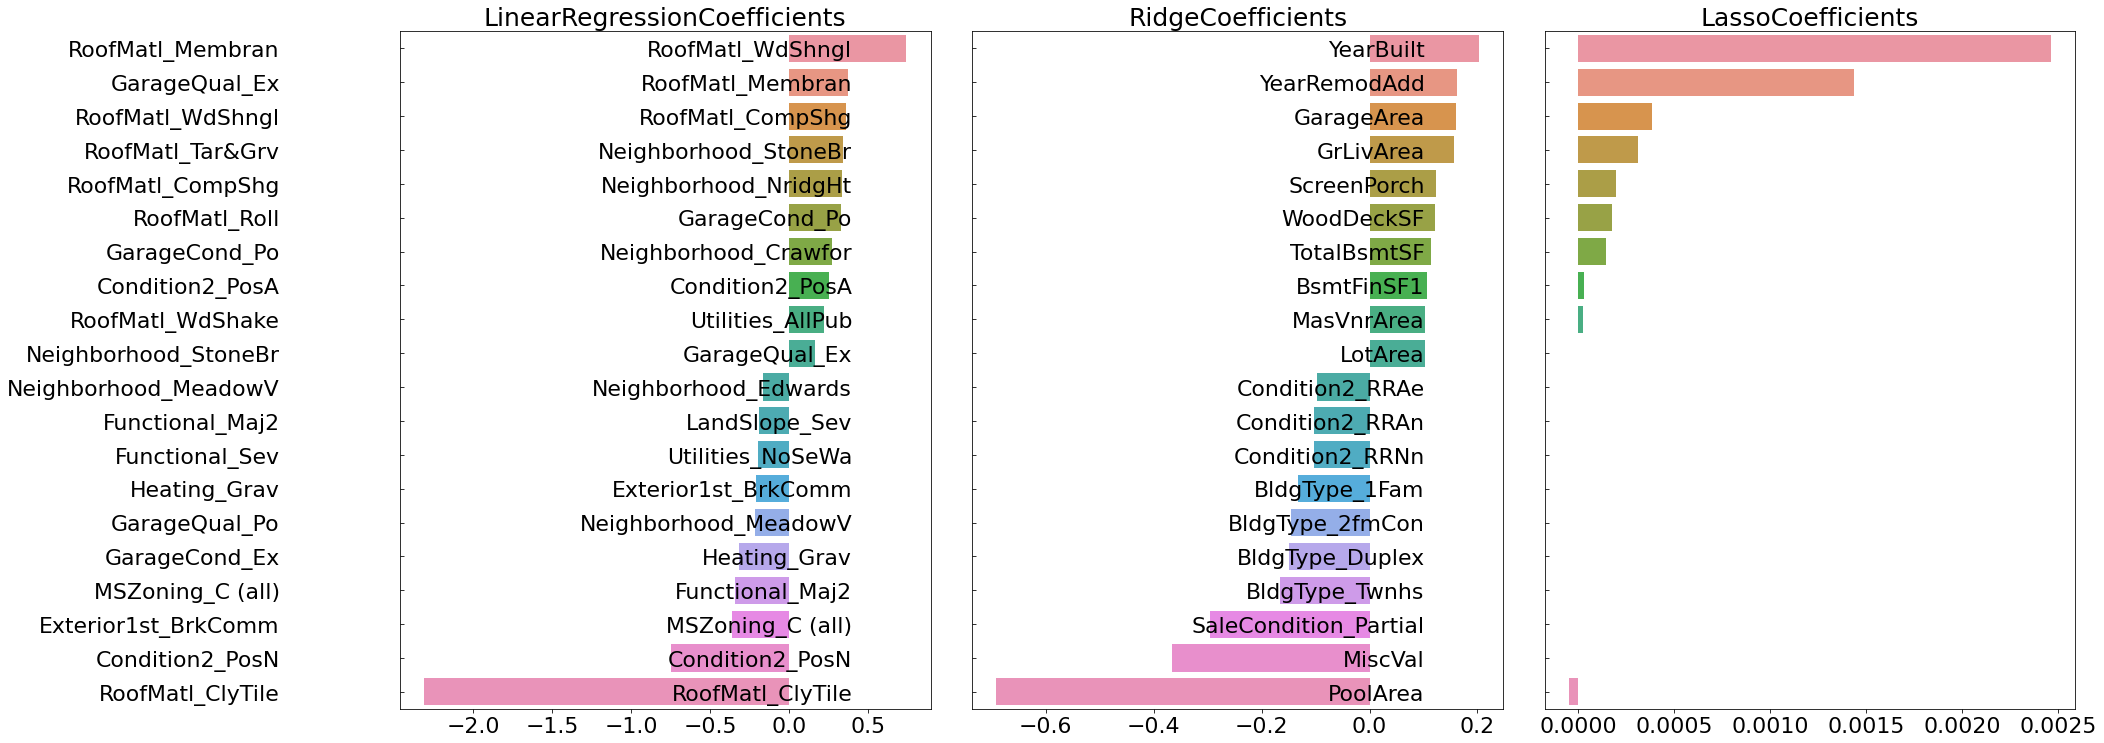

In [ ]:
models = [lr_reg, ridge_reg, lasso_reg]
vis_coef(models)

In [ ]:
""" 전체적으로 Lasso의 회귀계수가 매우 작고 편차가 너무 큼 """
""" 학습데이터의 데이터분할에 문제가 있을수 있음 """
""" 따라서 train_test_split 쓰지않고 전체 데이터세트를 교차검증 폴드세트로 분할해 평균 RMSE 계산 """

from sklearn.model_selection import cross_val_score

def avg_rmse_cv(models):
  for model in models:
    score = cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_list = np.sqrt(-score)
    rmse_avg = np.mean(rmse_list)
    print("{0} CV RMSE list:".format(model.__class__.__name__), np.round(rmse_list, 3))
    print("{0} CV RMSE avg:".format(model.__class__.__name__), np.round(rmse_avg, 3))

In [ ]:
models = [lr_reg, ridge_reg, lasso_reg]
avg_rmse_cv(models)

# 같은결과이므로 라쏘 모델의 성능이 전체적으로 떨어지는 것을 알 수 있음

LinearRegression CV RMSE list: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV RMSE avg: 0.155
Ridge CV RMSE list: [0.117 0.154 0.142 0.117 0.189]
Ridge CV RMSE avg: 0.144
Lasso CV RMSE list: [0.161 0.204 0.177 0.181 0.265]
Lasso CV RMSE avg: 0.198


### **파라미터 조정 후 재학습**

In [ ]:
# 릿지, 라쏘 모델 alpha 하이퍼 파라미터 변화
# 모델별 최적화 하이퍼 파라미터 작업 함수 생성

from sklearn.model_selection import GridSearchCV

def best_params(model, params):
  grid_model = GridSearchCV(model, param_grid=params, scoring="neg_mean_squared_error", cv=5)
  grid_model.fit(X_features, y_target)
  rmse = np.sqrt(-1*grid_model.best_score_)
  print(model.__class__.__name__, "5CV 최적 평균 RSME:", np.round(rmse, 3), ",최적 alpha:", grid_model.best_params_)

In [ ]:
ridge_params = {"alpha":[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {"alpha":[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

best_params(ridge_reg, ridge_params)
best_params(lasso_reg, lasso_params)

Ridge 5CV 최적 평균 RSME: 0.142 ,최적 alpha: {'alpha': 12}
Lasso 5CV 최적 평균 RSME: 0.142 ,최적 alpha: {'alpha': 0.001}


In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그변환된 RMSE : 0.137
Ridge 로그변환된 RMSE : 0.131
Lasso 로그변환된 RMSE : 0.128


[0.13716549514428528, 0.13093129676604154, 0.12751140334549535]

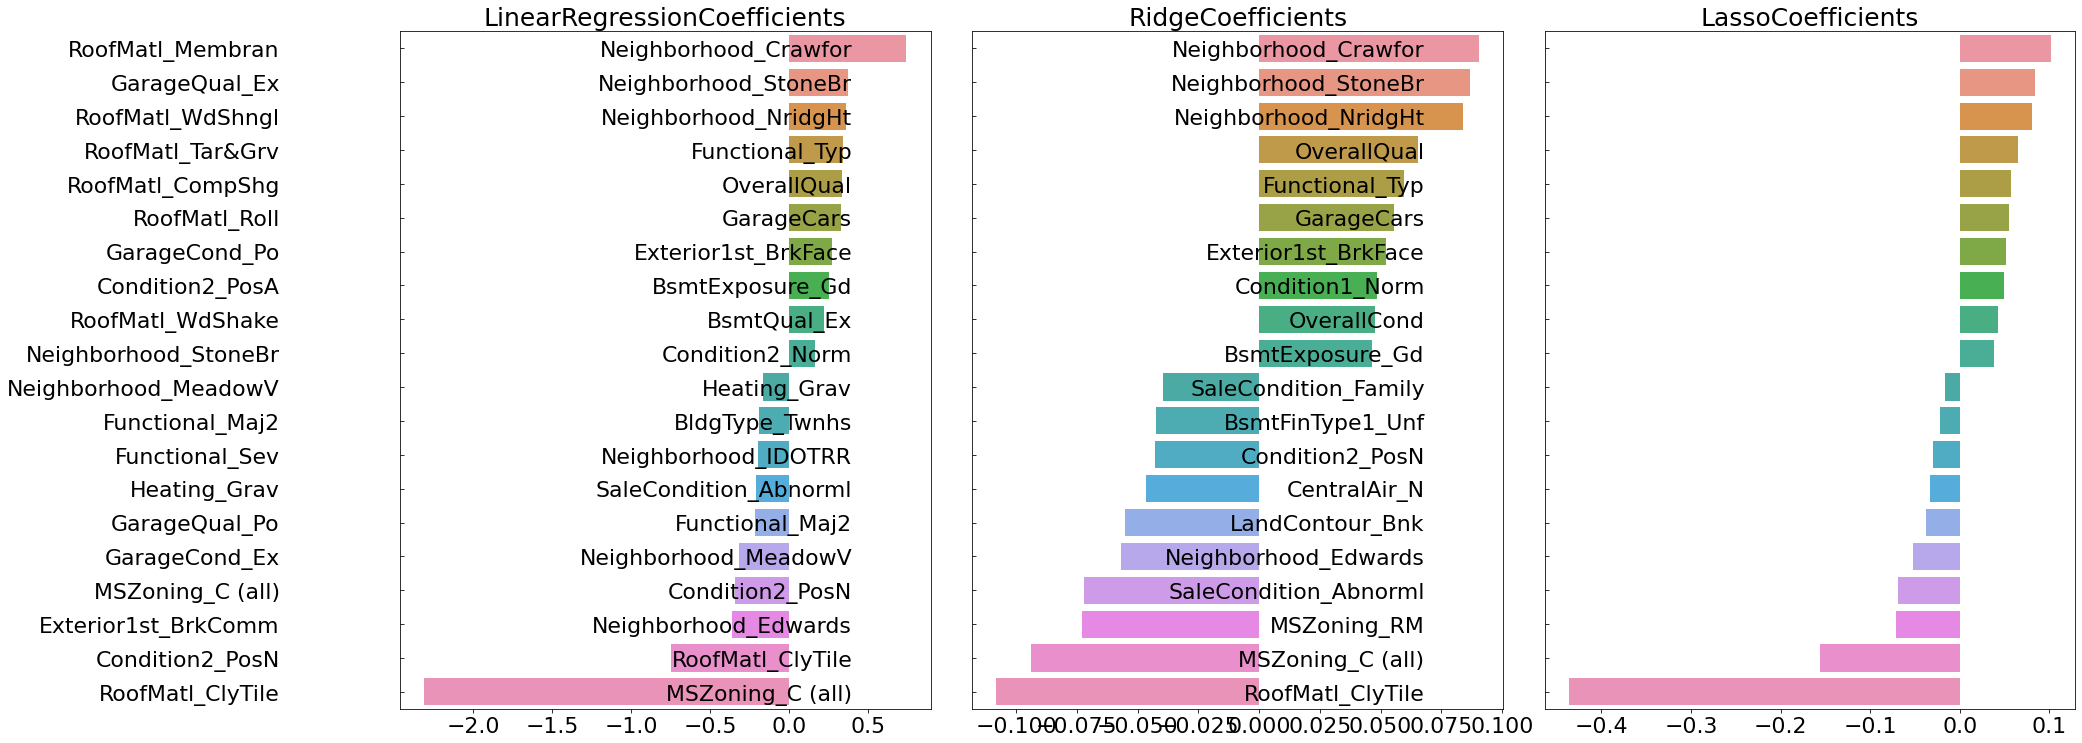

In [ ]:
vis_coef(models)

# **2차 가공**

### **피쳐데이터의 분포도**

In [ ]:
# 숫자형 피쳐의 왜곡 정도 확인
# skew() 이용
# 반환 값 1 이상인 경우 왜곡 정도가 높다 판단
# 1 이상인 피쳐에 대해 로그변환을 적용

""" 원핫 인코딩 적용된 숫자형에는 왜곡 정도에 따른 로그변환 적용해서는 안됨 """
""" 따라서 원핫 인코딩이 적용되지 않은 데이터 프레임을 사용 (df_ohe 말고 df 사용) """

from scipy.stats import skew

features_index = df.dtypes[df.dtypes != "object"].index
skew_features = df[features_index].apply(lambda x : skew(x))
skew_high = skew_features[skew_features>1]
print(skew_high.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [ ]:
df[skew_high.index] = np.log1p(df[skew_high.index])

In [ ]:
# 로그변환된 df를 다시 원핫인코딩 진행

df_ohe = pd.get_dummies(df)

y_target = df_ohe["SalePrice"]
X_features = df_ohe.drop("SalePrice", axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=1)

In [ ]:
# 학습 진행

ridge_params = {"alpha":[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {"alpha":[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

best_params(ridge_reg, ridge_params)
best_params(lasso_reg, lasso_params)

Ridge 5CV 최적 평균 RSME: 0.128 ,최적 alpha: {'alpha': 10}
Lasso 5CV 최적 평균 RSME: 0.125 ,최적 alpha: {'alpha': 0.001}


In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그변환된 RMSE : 0.13
Ridge 로그변환된 RMSE : 0.124
Lasso 로그변환된 RMSE : 0.121


[0.13033870451883053, 0.12410158206967593, 0.1209440019568302]

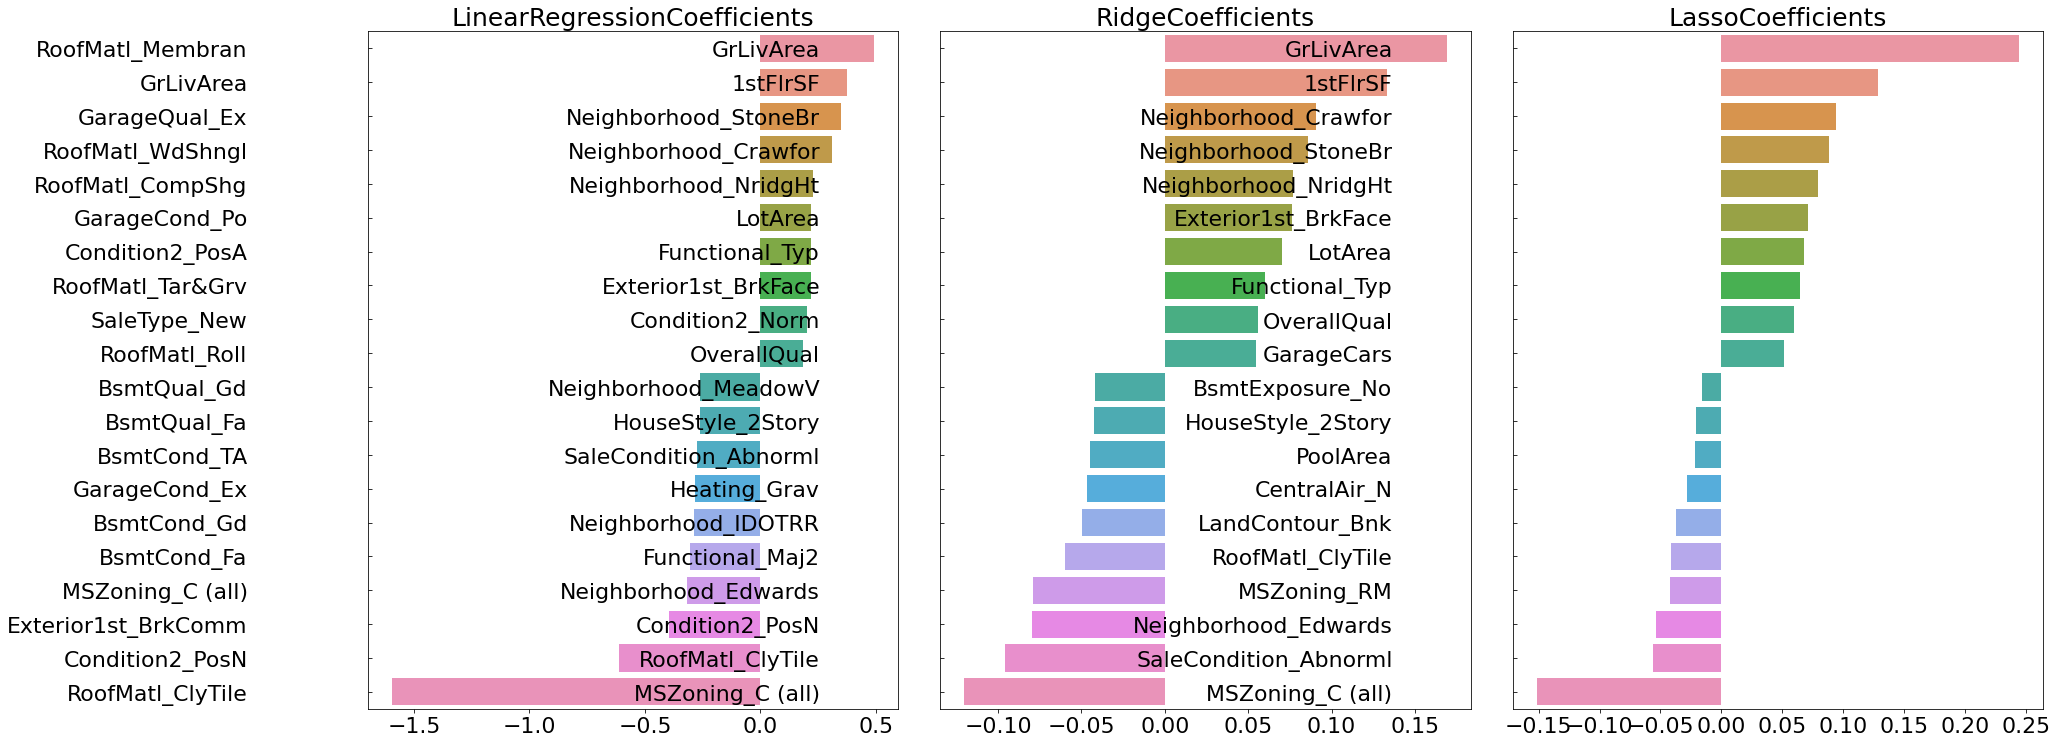

In [ ]:
vis_coef(models)

### **이상치 데이터 처리**
* 회귀계수가 높은 피쳐의 이상치 데이터 처리가 중요

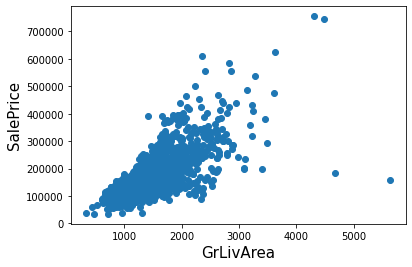

In [ ]:
# 원본 데이터를 사용해 GrLivArea와 Saleprice 관계를 시각화

plt.scatter(x=df_org["GrLivArea"], y=df_org["SalePrice"])
plt.xlabel("GrLivArea", fontsize=15)
plt.ylabel("SalePrice", fontsize=15)
plt.show()

# 아래에 면적이 넓으나 가격이 낮은 아웃라이어 값 2개 검출

In [ ]:
cond1 = df_ohe["GrLivArea"] > np.log1p(4000)
cond2 = df_ohe["SalePrice"] < np.log1p(500000)
outlier = df_ohe[cond1 & cond2].index
df_ohe.drop(outlier, axis=0, inplace=True)

In [ ]:
y_target = df_ohe["SalePrice"]
X_features = df_ohe.drop("SalePrice", axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=1)

In [ ]:
# 학습 진행

ridge_params = {"alpha":[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {"alpha":[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

best_params(ridge_reg, ridge_params)
best_params(lasso_reg, lasso_params)

Ridge 5CV 최적 평균 RSME: 0.113 ,최적 alpha: {'alpha': 8}
Lasso 5CV 최적 평균 RSME: 0.112 ,최적 alpha: {'alpha': 0.001}


In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그변환된 RMSE : 0.125
Ridge 로그변환된 RMSE : 0.121
Lasso 로그변환된 RMSE : 0.12


[0.12516861274725233, 0.12140724845088963, 0.12032319866344125]

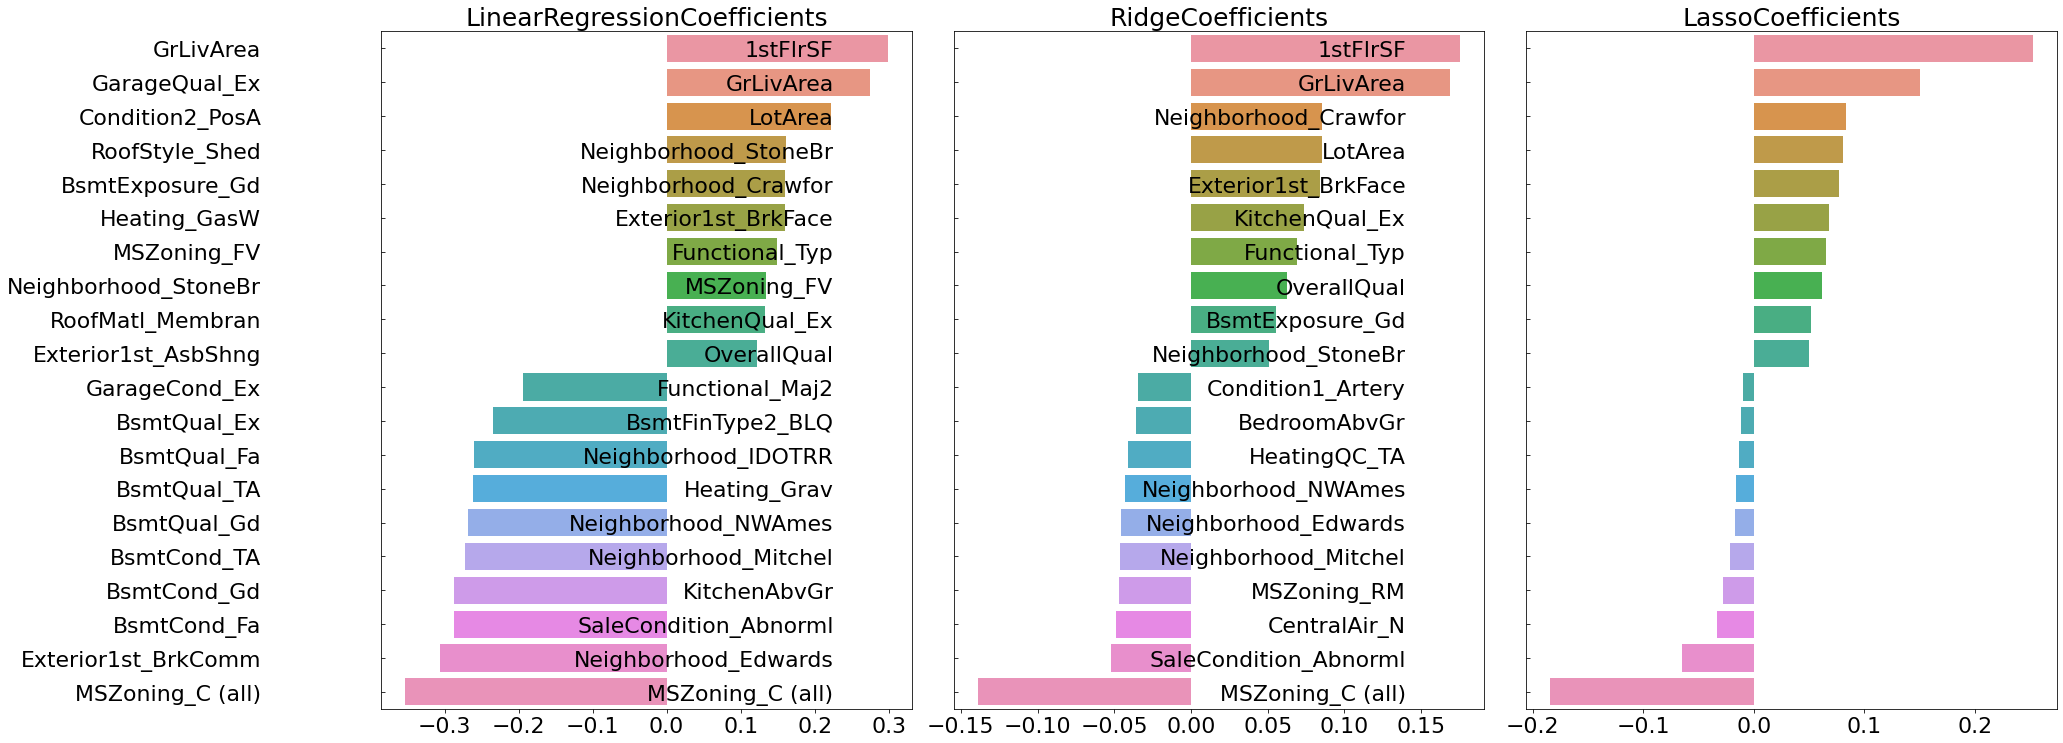

In [ ]:
vis_coef(models)

In [ ]:
""" 알고리즘을 적용하기 전에 완벽하게 데이터 선처리 작업을 수행하기는 어려움 """
""" 대략의 데이터 가공과 모델 최적화를 우선 수행 """
""" 이에 기반한 여러가지 데이터 가공과 모델 최적화를 반복적으로 수행하기!!! """

# **회귀트리 모델 사용**

In [ ]:
# 교차검증을 통한 5폴드세트에 대한 평균 RMSE 계산

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_params = {"n_estimators" :[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
best_params(xgb_reg, xgb_params)

[16:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:09:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:09:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5CV 최적 평균 RSME: 0.115 ,최적 alpha: {'n_estimators': 1000}


In [ ]:
lgbm_params = {"n_estimators" :[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, colsample_bytree=0.4, subsample=0.6, reg_lambda=10, n_jobs=-1)
best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5CV 최적 평균 RSME: 0.116 ,최적 alpha: {'n_estimators': 1000}


[16:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


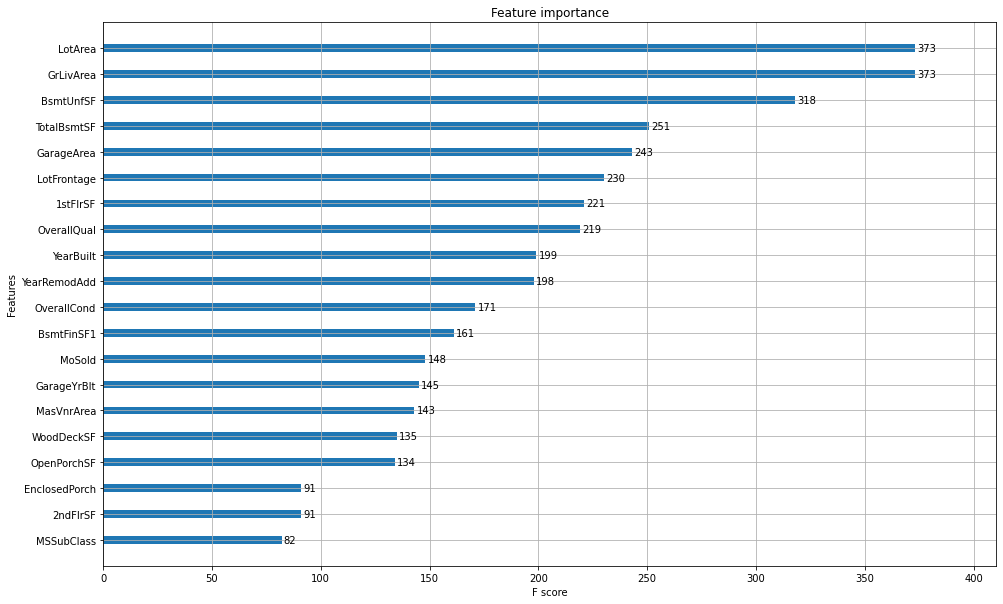

In [ ]:
from xgboost import plot_importance

xgb_reg.fit(X_train, y_train)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plot_importance(xgb_reg, ax=ax, max_num_features=20, height=0.3)

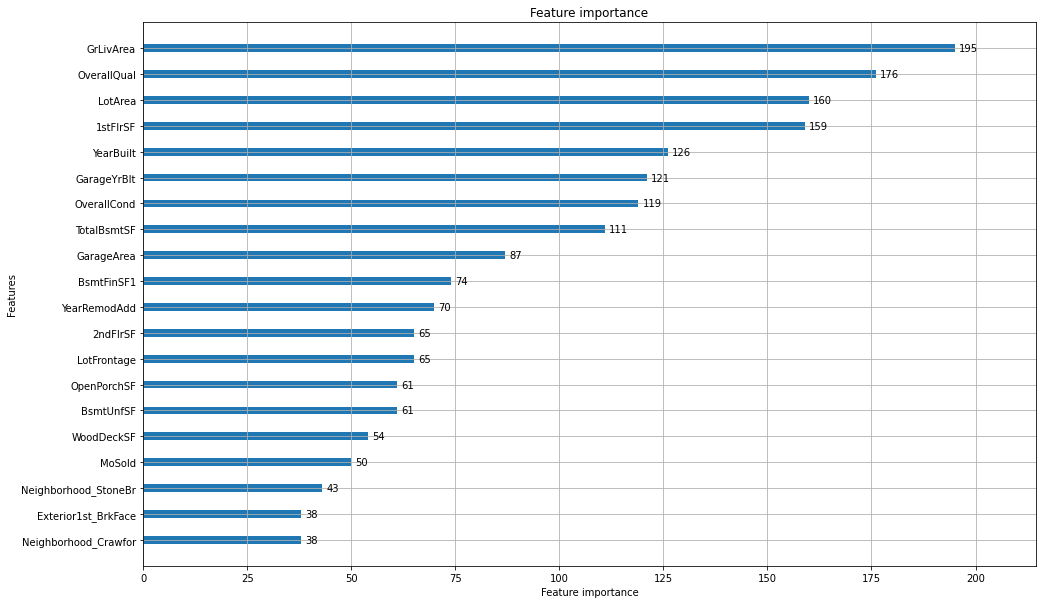

In [ ]:
from lightgbm import plot_importance

lgbm_reg.fit(X_train, y_train)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plot_importance(lgbm_reg, ax=ax, max_num_features=20, height=0.3)

# **개별 회귀모델의 예측 결과 혼합을 통한 최종 예측**
* 모델별 예측결과에 대한 가중치를 취하여 최종 회귀값 예측
* 성능이 더 좋은 모델에 대한 결과에 더 높은 가중치를 둠
* 가중치 결정 기준은 따로 없음

In [ ]:
# 릿지모델과 라쏘모델을 혼합

def get_comb_rmse(preds):
  for key in preds.keys():
    pred_value = preds[key]
    mse = mean_squared_error(y_test, pred_value)
    rmse = np.sqrt(mse)
    print("{0} 모델의 RMSE: {1}".format(key, rmse))

ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)
pred = 0.4*ridge_pred + 0.6*lasso_pred

preds = {"최종 혼합":pred,
         "Ridge":ridge_pred,
         "Lasso":lasso_pred}

get_comb_rmse(preds)

최종 혼합 모델의 RMSE: 0.11958331136199511
Ridge 모델의 RMSE: 0.12140724845088963
Lasso 모델의 RMSE: 0.12032319866344125


In [ ]:
# XGB와 LGBM 혼합

xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, colsample_bytree=0.4, subsample=0.6, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
pred = 0.5*xgb_pred + 0.5*lgbm_pred

preds = {"최종 혼합":pred,
         "XGB":xgb_pred,
         "LGBM":lgbm_pred}

get_comb_rmse(preds)

[16:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE: 0.11636661935704062
XGB 모델의 RMSE: 0.11678930278271608
LGBM 모델의 RMSE: 0.11993765026088118
